# 1. Stochastic Gradient Descent using SGDRegressor library of Scikit-learn.

# 2.1. Pre-Processing 
The following are the required pre-processing steps. Of course, you can add more as per your requirements. 
- Loading the data into Pandas DataFrame object. Remember to use public URLs to read the file. 
- Examining data for consistency: Check for null values, missing data, and any data inconsistency and handle them before proceeding forward. 
- Examining attributes and target variable(s): Be sure you clearly understand each of the attributes and the target variable. Examine the various attributes and convert any categorical ones to numerical ones, if needed. Obtain and output summary of the attributes. Are the attributes normally distributed? If not, what could be the reason? 
- Standardize and normalize the attributes. 
- Find how the attributes are correlated to each other and the target variable. Perform numerical and visual analysis and output plots and results. 
- Identify a few important attributes and proceed forward. Do not use all attributes blindly. 
- Split the data into training and testing parts. The ratio is up to you. 

In [240]:
# Loading the data into Pandas DataFrame object. Remember to use public URLs to read the file.
import pandas as pd
import numpy as np

# define column names manually
column_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                "density", "pH", "sulphates", "alcohol", "quality"]

df  = pd.read_csv("https://raw.githubusercontent.com/uy-seng/cs4372/main/assignment-1/dataset/winequality-red.csv", names=column_names, delimiter=";")

In [241]:
# check for null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [242]:
# check for missing value
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


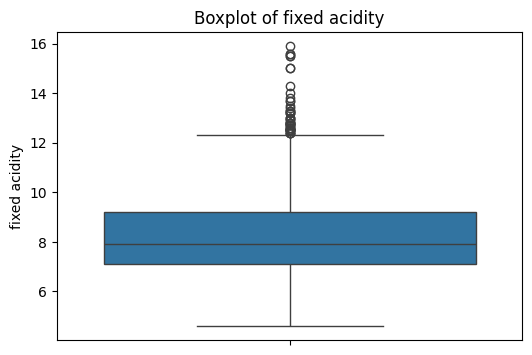

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


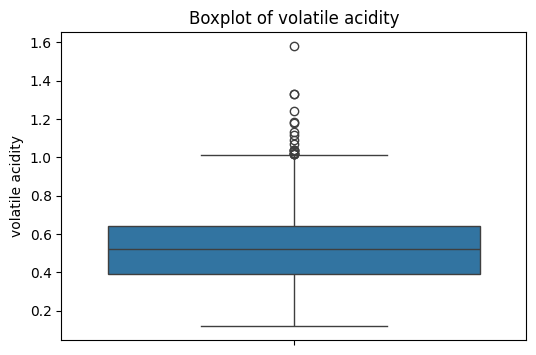

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


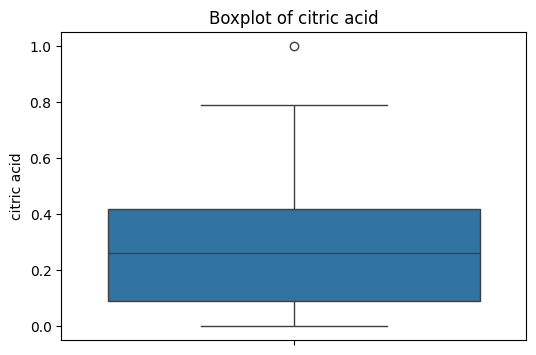

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


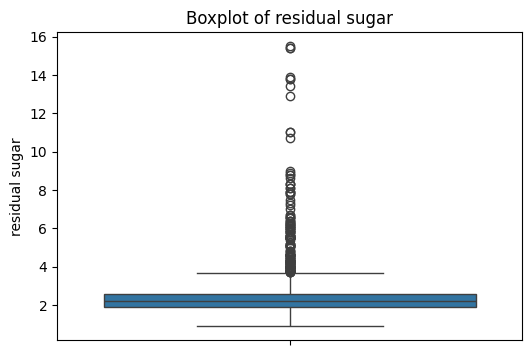

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


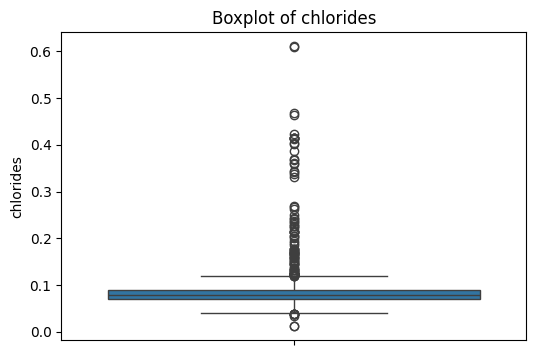

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


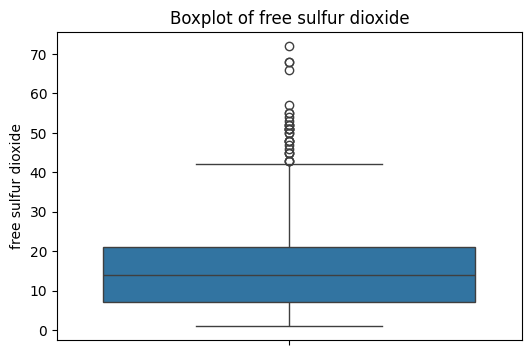

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


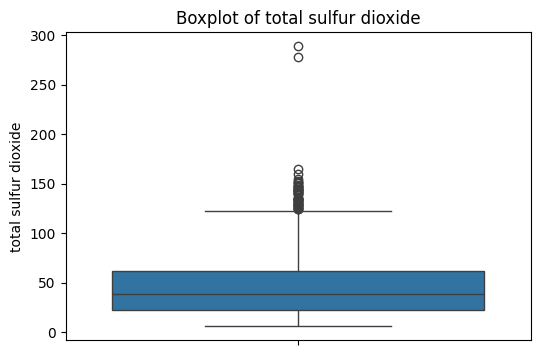

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


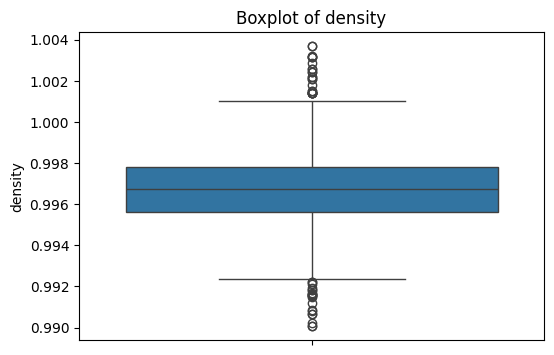

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


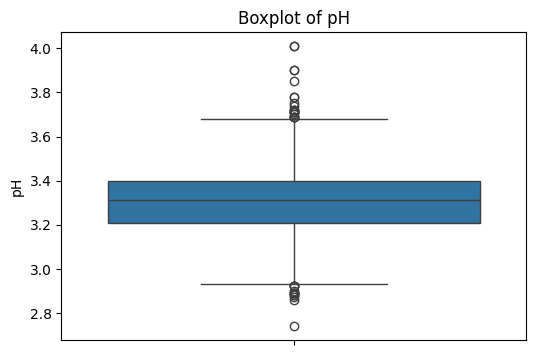

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


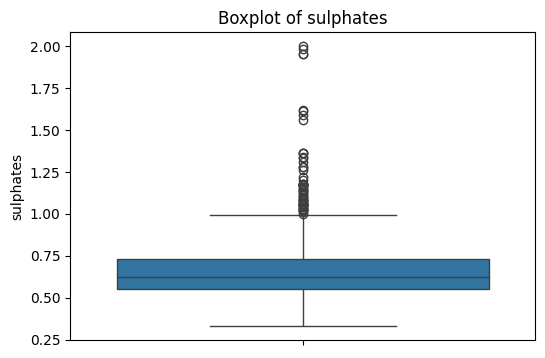

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


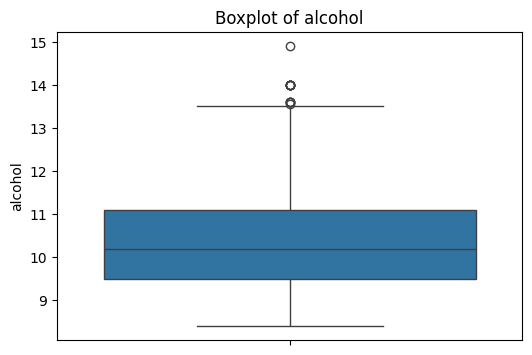

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


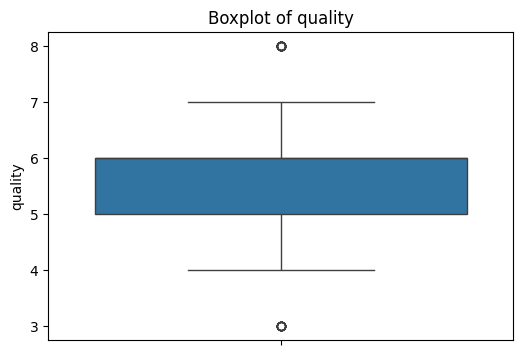

In [243]:
# # check for data inconsistency
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(6, 4))  # Set the figure size for each plot
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [244]:
df.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [245]:

# remove residual sugar
# remove free sulfur dioxide
# remove pH
df.drop(columns=["residual sugar", "free sulfur dioxide", "pH"], inplace=True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   sulphates             1599 non-null   float64
 7   alcohol               1599 non-null   float64
 8   quality               1599 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 112.6 KB


In [247]:
x = df.drop(columns=["quality"]).values
y = df["quality"].values


In [248]:
# standardlize the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [249]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=100_000, tol=1e-3)
sgd.fit(x_train, y_train)

SGDRegressor(max_iter=100000)

In [250]:
sgd.coef_

array([ 0.10367069, -0.19966099, -0.01857297, -0.09257754, -0.07848715,
       -0.04842413,  0.16798131,  0.27888715])

In [251]:
sgd.score(x_test, y_test)

0.3709485622564319

In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Number of predictors and observations
k = x_train.shape[1]  # number of predictors
n = x_train.shape[0]  # number of observations

# Calculate the F-statistic
f_statistic = (r2 / k) / ((1 - r2) / (n - k - 1))

In [253]:
# "mean square error": mse, mae, ev, r2
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("explained variance score: ", ev)
print("r2: ", r2)
print("f-statistic", f_statistic)


mean squared error:  0.37712985170425173
mean absolute error:  0.47323347687860284
explained variance score:  0.3797954419431694
r2:  0.3709485622564319
f-statistic 93.61410009560173


# 2. Ordinary Linear Regression using the statsmodels library

In [254]:
import statsmodels.api as sm

df  = pd.read_csv("https://raw.githubusercontent.com/uy-seng/cs4372/main/assignment-1/dataset/winequality-red.csv", names=column_names, delimiter=";")

In [255]:
x = df.drop('quality', axis=1)
y = df['quality']

features = ["volatile acidity",
                "chlorides","total sulfur dioxide", "pH", "sulphates", "alcohol"]

In [256]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [257]:
x = x[features]

x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [258]:
ols_model = sm.OLS(y_train, x_train)
res = ols_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.55e-111
Time:                        12:43:51   Log-Likelihood:                -1263.8
No. Observations:                1279   AIC:                             2542.
Df Residuals:                    1272   BIC:                             2578.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4950      0.455      9.877      0.000       3.602       5.388
volatile acidity        -1.0054      0.113     -8.914      0.000      -1.227      -0.784
chlorides               -2.0517      0.428     -4.795      0.000      -2.891      -1.212
total sulfur dioxide    -0.0026      0.001     -4.468      0.000      -0.004      -0.001
pH                      -0.4321      0.131     -3.291      0.001      -0.690      -0.175
sulphates                0.8558      0.119      7.181      0.000       0.622       1.090
alcohol                  0.2727      0.019     14.420      0.000       0.236       0.310
==============================================================================
Omnibus:                       25.659   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.668
Skew:                          -0.181   Prob(JB):                     2.43e-09
Kurtosis:                       3.783   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""